<h2><center> Quantitative Trading Strategies - Assignment 2 </center></h2>

<h3><span style="color:#00008B">Submitted by - Krishna Vardhan Diggavi </span></h3>

<h3><span style="color:#00008B">Email - krishnadiggavi@uchicago.edu</span></h3>

- In this assignment we are going to implement a trading strategy based on Mean Reversion strategy. Here is the brief info about the strategy. <br>

# Mean Reversion Strategy

### Description:<br>
- Mean reversion is a trading strategy that assumes that prices and returns eventually move back toward their historical average or "mean." <br><br>
- Traders who employ this strategy believe that prices that deviate too far from their average will eventually revert back to that average, and they will enter into positions that will profit from that reversion. <br> <br>
- This strategy is often used in the context of statistical arbitrage and can be applied to a variety of financial instruments such as stocks, bonds, and currencies. <br><br>

### Advantages:<br>
- It can be profitable in a wide range of market conditions: Mean reversion strategies can be effective in both bullish and bearish market conditions, as well as in sideways markets.<br><br>

- It can be relatively low risk: Because mean reversion strategies involve taking positions that profit from small changes in price, rather than large price movements, the potential losses from these strategies can be limited.<br><br>

- It can be automated: Mean reversion strategies can be easily implemented using automated trading systems, which can help to reduce the risk of human error.<br><br>

- It can be used in combination with other strategies: Mean reversion strategies can be used in conjunction with other trading strategies, such as trend following strategies, to create a more diversified trading approach.<br><br>
- It is based on a logical principle that prices tend to return to their mean over time<br><br>


### Disadvantages:<br>
- It can be difficult to predict the timing of reversion: Mean reversion strategies are based on the assumption that prices will eventually move back toward their historical average, but it can be difficult to predict exactly when this will happen.<br><br>

- It can be affected by market conditions: Mean reversion strategies may not be as effective during times of high volatility or economic uncertainty, as prices may deviate significantly from their historical averages.<br><br>

- It can be affected by changes in fundamentals: Changes in a company's fundamentals, such as a change in management or a major acquisition, can cause the historical mean of a stock's price to change, rendering past historical mean irrelevant.<br><br>

- The strategy is not suitable for long-term investments: Mean reversion is a short-term strategy and assumes that the prices will return to their mean over a short period. In the long run, companies that have a strong growth potential may have prices that diverge away from the mean.<br><br>


### How to tackle disadvantages:<br>

- Combine it with other strategies: By combining mean reversion strategies with other strategies, such as trend following or fundamental analysis, traders can create a more diversified trading approach that can be more resilient to market conditions and changes in fundamentals.<br><br>

- Monitor market conditions: Traders should monitor market conditions and adjust their trading approach as necessary. For example, during times of high volatility or economic uncertainty, traders may want to reduce their exposure to mean reversion strategies and focus on other strategies that may be better suited to the current market conditions.<br><br>

- Use stop-losses: By using stop-loss orders, traders can limit their potential losses if a trade goes against them. This can help to mitigate the risk of large losses while still allowing traders to take advantage of the potential profits from mean reversion strategies.<br><br>

- Implementing risk management techniques: Traders should use risk management techniques, such as position sizing and diversification, to limit their overall exposure to risk, which can help to mitigate the potential losses from a mean reversion strategy that doesn't work out.<br><br>

- Use advanced analytics tools and techniques: Traders can use advanced analytics tools and techniques such as machine learning, natural language processing, and sentiment analysis, to identify market manipulation and price anomalies that may affect the mean reversion strategy.<br><br>


# Import Functions

In [960]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.rcParams["figure.figsize"] = (16,6)
import statsmodels.api as sm
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.rcParams["figure.figsize"] = (16,6)


### The ETF's I would be analyzing today with Mean Reversion Strategy are RYE and XOP (01) <br>

### RYE ETF:<br>

- RYE ETF is an exchange-traded fund (ETF) that tracks the performance of the Invesco S&P 500 Equal Weight Energy Index. This index is designed to measure the performance of the energy sector of the S&P 500 index, with an equal weighting approach, meaning that each of the companies in the index is given an equal weight, regardless of its market capitalization.<br><br>

- The ETF holds a portfolio of stocks that are primarily engaged in the exploration, production, refining, and marketing of oil and gas, and other energy-related businesses. The ETF is rebalanced quarterly to ensure that the weightings of the companies in the index remain equal.<br><br>

- RYE ETF can be traded on a stock exchange just like a stock, and it offers investors a convenient way to gain exposure to the energy sector of the S&P 500 index. The ETF is managed by Invesco, a global asset management company.<br><br>




### XOP ETF:<br>

- XOP ETF is an exchange-traded fund (ETF) that tracks the performance of the SPDR S&P Oil & Gas Exploration & Production ETF. This index is designed to measure the performance of companies involved in the exploration, production, and development of oil and natural gas.<br><br>

- The ETF holds a portfolio of stocks of companies primarily engaged in the exploration, production, refining, and marketing of oil and gas, and other energy-related businesses. It also includes companies involved in the production of natural gas and oil, and the refining and marketing of these commodities. The ETF is rebalanced periodically to ensure that the weightings of the companies in the index remain representative of the sector.<br><br>

- XOP ETF can be traded on a stock exchange just like a stock, and it offers investors a convenient way to gain exposure to the exploration and production of oil and gas sector. The ETF is managed by State Street Global Advisors, a global investment management company.<br><br>


### Importing the data from Quandl

In [982]:
import quandl

In [983]:
rye = quandl.get_table('QUOTEMEDIA/PRICES', date = {'gte':'2020-12-02','lte': '2022-11-15'}, ticker='RYE', api_key= 'nVwoRNxyU88t5sMKgzAt')
rye = rye.set_index('date')
rye = rye.sort_index(ascending=True) 
rye.head()

,ticker,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2020-12-02,RYE,29.00,30.6900,28.870,30.1200,48138.0,0.0,1.0,27.637162,29.247742,27.513271,28.704528,48138.0
2020-12-03,RYE,30.35,31.1200,30.170,30.7400,64325.0,0.0,1.0,28.923720,29.657534,28.752179,29.295392,64325.0
2020-12-04,RYE,31.36,32.9800,31.360,32.9795,41692.0,0.0,1.0,29.886255,31.430124,29.886255,31.429648,41692.0
2020-12-07,RYE,32.50,32.6929,31.985,32.1700,39817.0,0.0,1.0,30.972682,31.156516,30.481884,30.658190,39817.0
2020-12-08,RYE,31.78,32.9000,31.630,32.6104,40801.0,0.0,1.0,30.286518,31.353884,30.143567,31.077893,40801.0


In [984]:
xop = quandl.get_table('QUOTEMEDIA/PRICES', date = { 'gte':'2020-12-02','lte': '2022-11-15' }, ticker='XOP', api_key= 'nVwoRNxyU88t5sMKgzAt')
xop = xop.set_index('date')
xop = xop.sort_index(ascending=True) 
xop.head()

,ticker,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2020-12-02,XOP,53.60,56.97,53.28,55.54,12448984.0,0.0,1.0,51.910709,55.174498,51.600795,53.789567,12448984.0
2020-12-03,XOP,55.88,57.28,54.86,56.25,10213561.0,0.0,1.0,54.118851,55.474728,53.130998,54.477190,10213561.0
2020-12-04,XOP,57.60,61.06,57.57,61.00,16412128.0,0.0,1.0,55.784643,59.135595,55.755588,59.077486,16412128.0
2020-12-07,XOP,60.05,60.41,58.53,58.97,12478224.0,0.0,1.0,58.157427,58.506081,56.685332,57.111465,12478224.0
2020-12-08,XOP,58.48,60.72,58.28,59.87,11476758.0,0.0,1.0,56.636908,58.806311,56.443211,57.983100,11476758.0


### Calculating the Dollar Volume and Median:<br>

- We calculate the dollar volume by taking the product of adj close price and volume of the ETF.<br><br>

- we calculate the 15 trading day median by taking .rolling(15).median() for dollar volume column. <br><br>


In [985]:
rye = rye.rename(columns = {'adj_close': 'rye_close','adj_volume': 'rye_volume'})
rye['rye_dollar_volume'] = rye['rye_volume']*rye['rye_close']
xop = xop.rename(columns = {'adj_close': 'xop_close','adj_volume': 'xop_volume'})
xop['xop_dollar_volume'] = xop['xop_volume']*xop['xop_close']
df = pd.concat([rye['rye_close'],rye['rye_volume'], rye['rye_dollar_volume'],xop['xop_close'],xop['xop_volume'],xop['xop_dollar_volume']], axis=1, join='outer')
df['rye_median']=df["rye_dollar_volume"].rolling(15).median()
df['xop_median']=df["xop_dollar_volume"].rolling(15).median()
df.head()

,rye_close,rye_volume,rye_dollar_volume,xop_close,xop_volume,xop_dollar_volume,rye_median,xop_median
date,,,,,,,,
2020-12-02,28.704528,48138.0,1.381779e+06,53.789567,12448984.0,6.696255e+08,NaN,NaN
2020-12-03,29.295392,64325.0,1.884426e+06,54.477190,10213561.0,5.564061e+08,NaN,NaN
2020-12-04,31.429648,41692.0,1.310365e+06,59.077486,16412128.0,9.695873e+08,NaN,NaN
2020-12-07,30.658190,39817.0,1.220717e+06,57.111465,12478224.0,7.126497e+08,NaN,NaN
2020-12-08,31.077893,40801.0,1.268009e+06,57.983100,11476758.0,6.654580e+08,NaN,NaN


### Calculating the Nt:<br>

- We calculate the Nt for each column by taking the value of Nt as lower median of XOP vs RYE. <br><br>

In [986]:
df["Nt"] = np.where(df.rye_median>df.xop_median,df.xop_median,df.rye_median)
df = df.dropna()
df.head()

,rye_close,rye_volume,rye_dollar_volume,xop_close,xop_volume,xop_dollar_volume,rye_median,xop_median,Nt
date,,,,,,,,,
2020-12-22,29.167695,22613.0,6.595691e+05,55.770605,4857325.0,2.708960e+08,1.268009e+06,6.269844e+08,1.268009e+06
2020-12-23,30.121147,148951.0,4.486575e+06,58.282181,7124032.0,4.152041e+08,1.268009e+06,5.956567e+08,1.268009e+06
2020-12-24,29.823583,16649.0,4.965328e+05,57.435254,3547530.0,2.037533e+08,1.220717e+06,5.956567e+08,1.220717e+06
2020-12-28,29.592347,36858.0,1.090715e+06,56.383897,5385490.0,3.036549e+08,1.090715e+06,4.893008e+08,1.090715e+06
2020-12-29,29.391636,32508.0,9.554633e+05,55.867953,5056715.0,2.825083e+08,1.068894e+06,4.152041e+08,1.068894e+06


### Importing the Famma French data:<br>

- We import the Famma French factors data by downloading the file from Ken French's website and pass it into dataframe which is later used for regression purpose.<br><br>

In [987]:
famma_french = pd.read_csv(r'C:\Users\Krishna Diggavi\Downloads\Developed_5_Factors_Daily_K.csv')
famma_french['Date']=pd.to_datetime(famma_french['Date'], format='%Y%m%d')
famma_french= famma_french.set_index('Date')
famma_french.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1990-07-02,0.69,-0.08,-0.33,0.21,0.00,0.03
1990-07-03,0.18,0.07,-0.15,0.05,0.04,0.03
1990-07-04,0.62,-0.18,-0.17,-0.04,0.01,0.03
1990-07-05,-0.74,0.31,0.14,-0.13,0.04,0.03
1990-07-06,0.20,-0.15,0.02,0.18,-0.03,0.03


# Section 3

# Implementing the Trading Strategy

### Defining the parameters:
- M is no of periods for calculating the returns of ETF. <br><br>
- g is upper bound for the spread, above which if we exceed we enter or maintain a position. <br><br>
- j is lower bound for the spread, below which we exit the position. <br><br>
- s is the stop loss parameter which is used to define stop loss value which on reaching we will exit the positions and do not trade till next month. <br><br>

### Procedure :

 - Firstly we calculate the returns of ETF using the pct change. <br><br>
 - We then calculate the spread by taking difference of returns from XOP with RYE ETF <br><br>

 - Now we generate the signals based on value of spread calculated by applying the conditions given in the question. <br><br>
- **Different cases:** <br><br>
   
    - If the value of spread is greater than g, then we go short the spread and signal is indicated as -1.  <br><br>
    - If the value of spread is less than -g, then we go long the spread and signal is indicated as 1.  <br><br>
    - If the value of spread is less than j, then we go long the spread and signal is indicated as 1.  <br><br>
    - If the value of spread is greater than -j, then we go short the spread and signal is indicated as -1.  <br><br>
    - If the value of spread hits the stoploss value, then we exit the positions and do not trade till start of next month.  <br><br>
    - If the hit the month end date, then we liquidate the positions that we are holding on the last day. <br><br>

In [1038]:
def mean_reversion(M,j,g,s):
    df["rye_returns"] = df["rye_close"].pct_change(periods=M)
    df["xop_returns"] = df["xop_close"].pct_change(periods=M)
    df["spread"] = df["xop_returns"]-df["rye_returns"]
    df1 = df[7:]
    
    
    df1["buy_sell"]=0
    flag_short=0
    flag_long =0
    
    last = 0
    stopup=0
    stopdown=0
    i=0
    for i in range(0,len(df1)):
        if i<len(df1)-2:
            if df1.index[i+1].month == df1.index[i].month and last==0:
                    
                if df1.spread[i]>g and flag_short==0:
                    df1.buy_sell[i] = -1
                    flag_short =1
                    stopup = .50 *(df1.rye_close[i]+df1.xop_close[i])
                    


                elif df1.spread[i]<-g and flag_long == 0:
                    df1.buy_sell[i] = 1

                    stopdown = -0.5 *(df1.rye_close[i]+df1.xop_close[i])
                    flag_long =1

                elif df1.spread[i]<j and flag_short==1:
                    df1.buy_sell[i] = 1
                    flag_short =0
                elif df1.spread[i]>stopup and flag_short==1:
                    df1.buy_sell[i] =1
                    flag_short=0
                    last =1


                elif df1.spread[i]>-j and flag_long ==1:
                    df1.buy_sell[i] = -1
                    flag_long =0
                elif df1.spread[i]>stopdown and flag_long ==1:
                    df1.buy_sell[i]=-1
                    flag_long=0
                    last =1
            
            elif df1.index[i+1].month!= df1.index[i].month:
                last =0
                if flag_short ==1:
                    df1.buy_sell[i] = 1
                    flag_short =0
                elif flag_long ==1:
                    df1.buy_sell[i] =-1
                    flag_long =0
                    
                        
        else:
            if flag_short ==1:
                df1.buy_sell[i] = 1
                flag_short=0
            elif flag_long ==1:
                df1.buy_sell[i] =-1
                flag_long =0
      
    return df1

In [1039]:
df1 =mean_reversion(5, 0,0.02,0.5)
df1.head()

,rye_close,rye_volume,rye_dollar_volume,xop_close,xop_volume,xop_dollar_volume,rye_median,xop_median,Nt,rye_returns,xop_returns,spread,buy_sell
date,,,,,,,,,,,,,
2021-01-04,29.929170,128408.0,3.843145e+06,57.464459,6752533.0,3.880307e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.003540,0.000508,-0.003032,0
2021-01-05,31.541775,45162.0,1.424490e+06,61.153944,16034458.0,9.805703e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.065876,0.084599,0.018723,0
2021-01-06,32.530455,53283.0,1.733320e+06,63.529232,12947115.0,8.225203e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.106793,0.137132,0.030339,-1
2021-01-07,33.192775,29077.0,9.651463e+05,64.765550,7004802.0,4.536699e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.101625,0.121544,0.019919,0
2021-01-08,32.900010,31540.0,1.037666e+06,63.762867,9401716.0,5.994804e+08,1.037666e+06,3.677944e+08,1.037666e+06,0.102491,0.119658,0.017168,0


Text(0, 0.5, 'Spread')

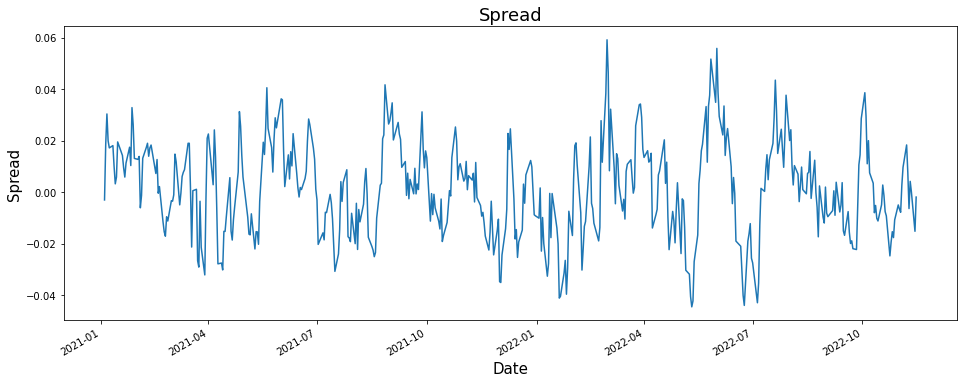

In [1040]:
df1['spread'].plot()
plt.title('Spread', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Spread', fontsize = 15)


# Plotting the Signal


 - We plot the signal based on the above logic for different input parameters.<br>

In [1041]:
def signal(df, g,j):
    df["g"] = g
    df["j"] = j
    df["gminus"] =-g
    df["jminus"]= -j
    y = df.spread
    f, ax = plt.subplots(figsize=(20,10))
    ax.plot(y)
    ax.plot(df[df["buy_sell"]==1].index,df[df["buy_sell"]==1].spread,'^', markersize=10, color='g')
    ax.plot(df[df["buy_sell"]==-1].index,df[df["buy_sell"]==-1].spread,'v', markersize=10, color='r')
    ax.plot(df.g)
    ax.plot(df.j)
    ax.plot(df.gminus)
    plt.show()

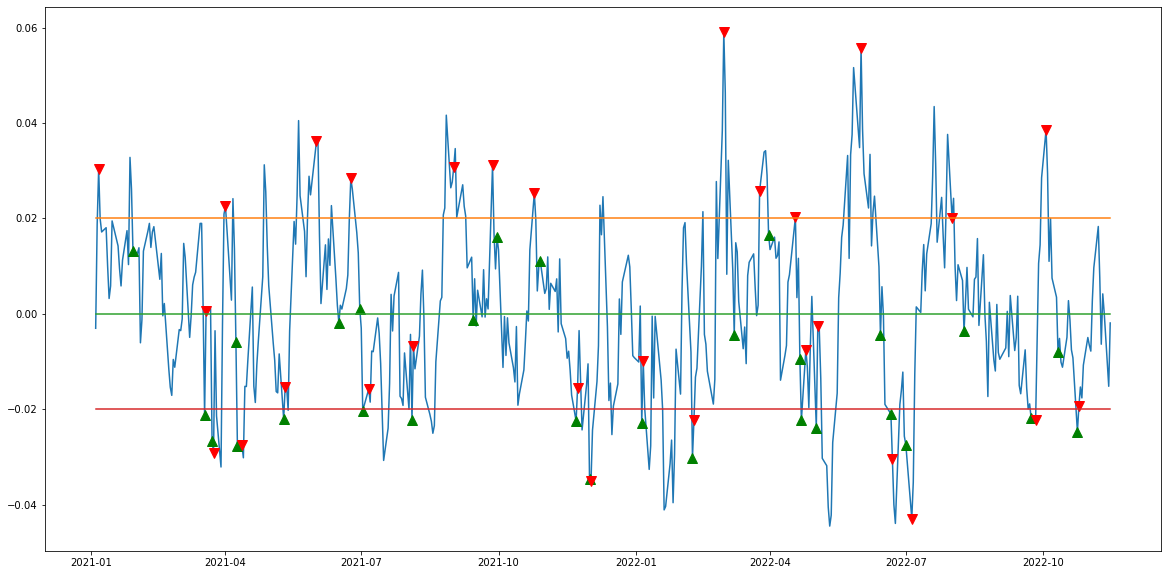

In [1042]:
signal(df1, 0.02, 0)

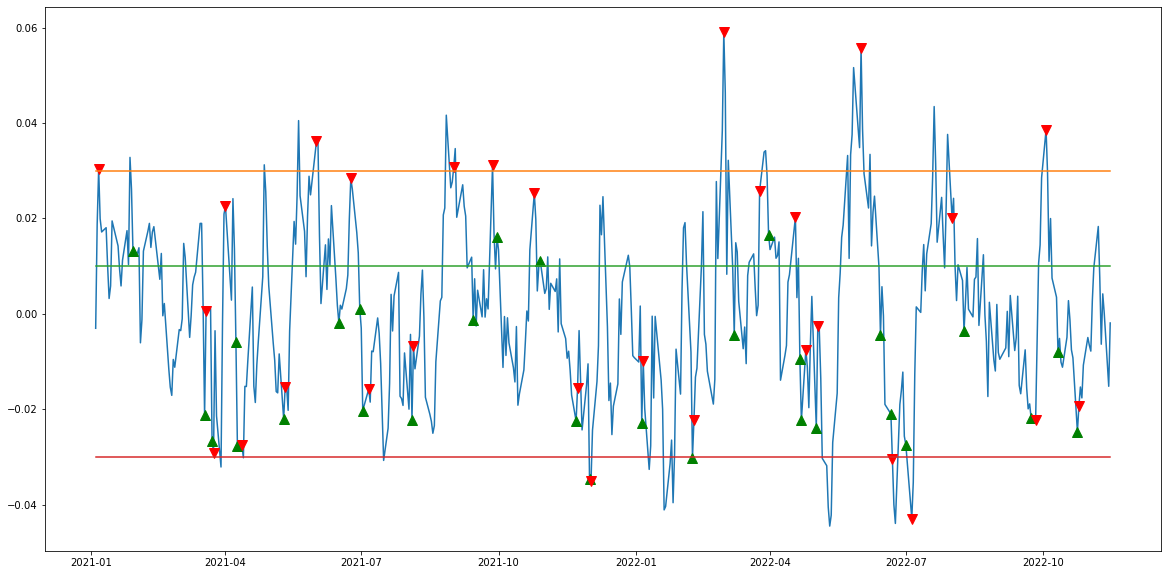

In [1043]:
signal(df1, 0.03, 0.01)

# Calculating the PnL, Cash, Returns

### Procedure :



### Case 1 - going Long position: <br>

   
 - If we are going long position means we are buying X and selling Y.<br><br>
 - We calculate the positions of ETF by taking Nt/100 divided by close price of ETF.- <br><br>
 - We calculate the cash by adding the already existing cash with (shares of XOP * close price of XOP - shares of RYE * close price  of RYE). <br><br>
 - We hold the position unless we get another signal.  <br><br>
 - During the days we hold the position, we calculate PnL by taking (shares of XOP * (present price - trade price of XOP) - (shares of RYE * (present price - trade price of RYE)))  <br><br>
 - The cash remains the same during the holding period as there is no addition or subraction of money.  <br><br>
 - Once we get a new signal, we exit the position we are holding by shorting the same number of shares. <br><br>



### Case 2 - going short position:<br>

   
- If we are going short position means we are buying Y and selling X.<br><br>
- We calculate the positions of ETF by taking Nt/100 divided by close price of ETF.- <br><br>
- We calculate the cash by adding the already existing cash with (shares of RYE * close price of RYE - shares of XOP * close price of XOP). <br><br>
- We hold the position unless we get another signal.  <br><br>
- During the days we hold the position, we calculate PnL by taking (shares of RYE * (present price - trade price of RYE) - (shares of XOP * (present price - trade price of XOP)))  <br><br>
- The cash remains the same during the holding period as there is no addition or subraction of money.  <br><br>
- Once we get a new signal, we exit the position we are holding by shorting the same number of shares. <br><br>



### Case 3 - no positions initiated after start of the month till the first signal: <br>

   
 - If we do not have signals after the start of the month, then we just have zero PnL and Cash as initital capital.<br><br>


In [1005]:
def Calculations(df1):
    capital =((df1['Nt'].mean()*2)/100)
    cash= capital
    df1['pnl']=0
    df1['cash']=cash
    df1['position_rye'] = 0
    df1['position_xop'] = 0
    df1['return'] =0
    flag_1= False
    flag_2 = False

    for i in range(0, len(df1)):
        if flag_1 == False and  flag_2 == False:
                if df1['buy_sell'][i]==1:         
                    df1['position_rye'][i] = int(int((df1['Nt'].fillna(0)[i])/100)/(int(df1['rye_close'][i])))
                    df1['position_xop'][i] = int(int((df1['Nt'].fillna(0)[i])/100)/(int(df1['xop_close'][i])))
                    trade_xop =df1['xop_close'][i]
                    trade_rye =df1['rye_close'][i]
                    df1['cash'][i]= float(cash + (df1['position_xop'][i]*df1['xop_close'][i]-df1['position_rye'][i]*df1['rye_close'][i]))
                    cash = df1['cash'][i]
                    df1['return'][i] = int((df1['pnl'][i]/df1['cash'][i])*100)
                    flag_1=True
                    flag_2 = False


                elif df1['buy_sell'][i]==0:   

                    df1['cash'][i]= cash
                    df1['return'][i] = int((df1['pnl'][i]/df1['cash'][i])*100)
                    flag_1=False
                    flag_2=False

                elif df1['buy_sell'][i]==-1:                    
                    df1['position_rye'][i] = int(int((df1['Nt'].fillna(0)[i])/100)/int(df1['rye_close'][i]))
                    df1['position_xop'][i] = int(int((df1['Nt'].fillna(0)[i])/100)/int(df1['xop_close'][i]))
                    trade_xop =df1['xop_close'][i]
                    trade_rye =df1['rye_close'][i]

                    df1['cash'][i]= float(cash + (df1['position_rye'][i]*df1['rye_close'][i]-df1['position_xop'][i]*df1['xop_close'][i]))
                    cash = df1['cash'][i]
                    df1['return'][i] = int((df1['pnl'][i]/df1['cash'][i])*100)
                    flag_1= True
                    flag_2=True

        elif flag_1==True and flag_2==True:
                df1['position_xop'][i] = df1['position_xop'][i-1]
                df1['position_rye'][i] = df1['position_rye'][i-1]
                df1['pnl'][i]= int(((df1['rye_close'][i]-trade_rye)*df1['position_rye'][i]) - ((df1['position_xop'][i])*(df1['xop_close'][i]-trade_xop)))
                df1['cash'][i] = cash
                df1['return'][i] = int((df1['pnl'][i]/df1['cash'][i])*100)

                if df1['buy_sell'][i]!=0:
                    df1['position_rye'][i] = -df1['position_rye'][i]
                    df1['position_xop'][i] = - df1['position_xop'][i]
                    df1['cash'][i]= float(cash + df1['pnl'][i])
                    cash = df1['cash'][i]
                    df1['return'][i] = int((df1['pnl'][i]/df1['cash'][i])*100)
                    flag_1=False
                    flag_2=False


        elif flag_1==True and flag_2==False: 
                df1['position_xop'][i] = df1['position_xop'][i-1]
                df1['position_rye'][i] = df1['position_rye'][i-1]
                df1['pnl'][i]= int(((df1['xop_close'][i]-trade_xop)*df1['position_xop'][i]) - ((df1['position_rye'][i])*(df1['rye_close'][i]-trade_rye)))
                df1['cash'][i] = cash
                df1['return'][i] = int((df1['pnl'][i]/df1['cash'][i])*100)

                if df1['buy_sell'][i]!=0:
                    df1['position_rye'][i] = -df1['position_rye'][i]
                    df1['position_xop'][i] = - df1['position_xop'][i]
                    df1['cash'][i]= float(cash + df1['pnl'][i])
                    cash = df1['cash'][i]
                    df1['return'][i] = int((df1['pnl'][i]/df1['cash'][i])*100)
                    flag_1=False
                    flag_2=False
    return df1
                

In [1012]:
df_1 = Calculations(df1)
df_1=df1.drop(columns =['g', 'j', 'gminus', 'jminus'])
df_1['return'] =df1['return'].astype(float)
df1['cum_pnl']= df1['pnl'].cumsum()
df_1.head(25)

,rye_close,rye_volume,rye_dollar_volume,xop_close,xop_volume,xop_dollar_volume,rye_median,xop_median,Nt,rye_returns,xop_returns,spread,buy_sell,pnl,cash,position_rye,position_xop,return,cum_pnl
date,,,,,,,,,,,,,,,,,,,
2021-01-04,29.929170,128408.0,3.843145e+06,57.464459,6752533.0,3.880307e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.003540,0.000508,-0.003032,0,0,148297.510991,0,0,0.0,0
2021-01-05,31.541775,45162.0,1.424490e+06,61.153944,16034458.0,9.805703e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.065876,0.084599,0.018723,0,0,148297.510991,0,0,0.0,0
2021-01-06,32.530455,53283.0,1.733320e+06,63.529232,12947115.0,8.225203e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.106793,0.137132,0.030339,-1,0,148415.520934,320,162,0.0,0
2021-01-07,33.192775,29077.0,9.651463e+05,64.765550,7004802.0,4.536699e+08,1.024515e+06,3.677944e+08,1.024515e+06,0.101625,0.121544,0.019919,0,11,148415.520934,320,162,0.0,11
2021-01-08,32.900010,31540.0,1.037666e+06,63.762867,9401716.0,5.994804e+08,1.037666e+06,3.677944e+08,1.037666e+06,0.102491,0.119658,0.017168,0,80,148415.520934,320,162,0.0,91
2021-01-11,33.368817,10956.0,3.655888e+05,65.106268,7241237.0,4.714499e+08,1.037666e+06,3.880307e+08,1.037666e+06,0.114926,0.132983,0.018057,0,12,148415.520934,320,162,0.0,103
2021-01-12,35.141338,79036.0,2.777431e+06,68.747079,13133972.0,9.029222e+08,1.037666e+06,3.910158e+08,1.037666e+06,0.114121,0.124164,0.010044,0,-9,148415.520934,320,162,0.0,94
2021-01-13,34.459629,38322.0,1.320562e+06,67.501026,9522413.0,6.427726e+08,1.090715e+06,4.152041e+08,1.090715e+06,0.059304,0.062519,0.003216,0,-26,148415.520934,320,162,0.0,68
2021-01-14,35.582885,34922.0,1.242625e+06,69.808171,10576573.0,7.383312e+08,1.111537e+06,4.536699e+08,1.111537e+06,0.072007,0.077860,0.005853,0,-40,148415.520934,320,162,0.0,28


# Plotting the PnL for different combinations of input parameters:

### for M=5, j=0, g=0.02 and s=0.5

Text(0, 0.5, 'Spread')

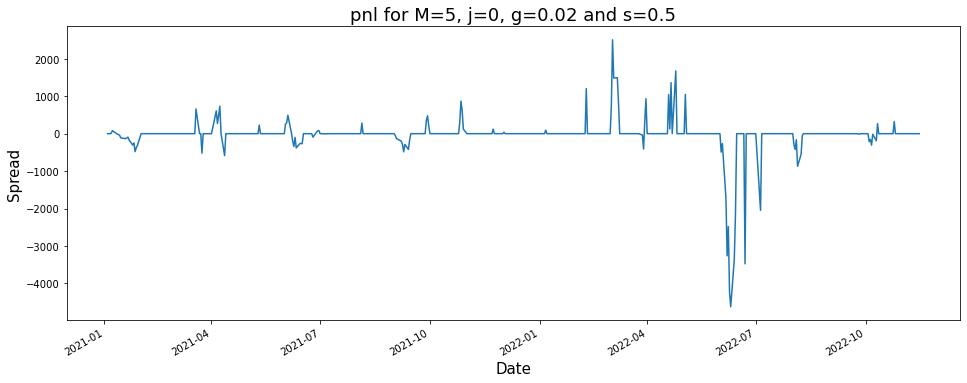

In [1020]:
df_1['pnl'].plot()
plt.title('pnl for M=5, j=0, g=0.02 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('PnL', fontsize = 15)

### for M=5, j=0.025, g=0.05 and s=0.5

Text(0, 0.5, 'Spread')

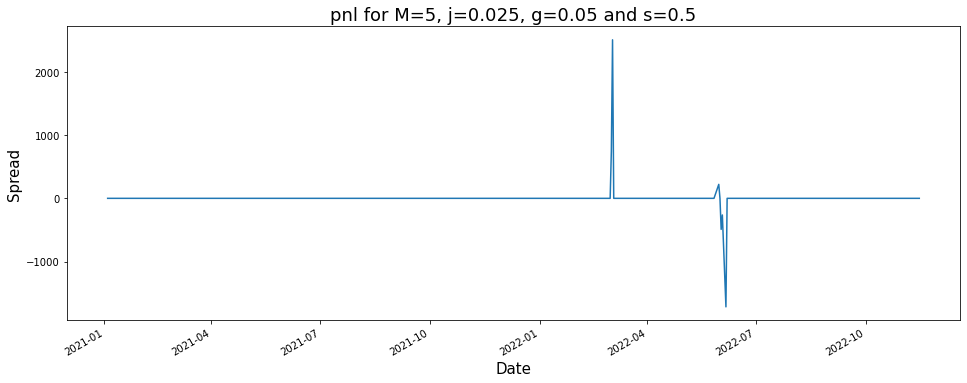

In [1021]:
df2 =trading_strategy(5, 0.025,0.05,0.5)
df_2 = Calculations(df2)
df_2['return'] =df_2['return'].astype(float)
df_2['cum_pnl']= df_2['pnl'].cumsum()
df_2['pnl'].plot()
plt.title('pnl for M=5, j=0.025, g=0.05 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('PnL', fontsize = 15)

### for M=5, j=0.001, g=0.025 and s=0.5

Text(0, 0.5, 'Spread')

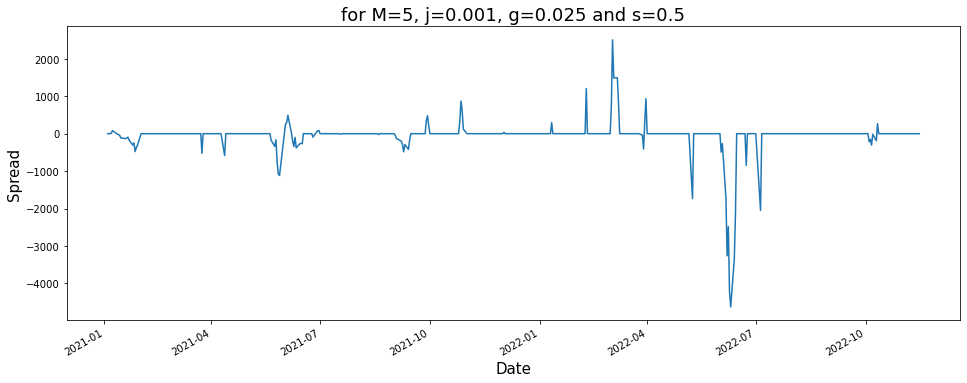

In [1023]:
df3 =trading_strategy(5, 0.001,0.025,0.5)
df_3 = Calculations(df3)
df_3['return'] =df_3['return'].astype(float)
df_3['cum_pnl']= df_3['pnl'].cumsum()
df_3['pnl'].plot()
plt.title('for M=5, j=0.001, g=0.025 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('PnL', fontsize = 15)

### Observation:
 - We can infer that the maximum negative PnL is observed in case of 1 and 3 and is less in case 2 mainly during July 2022.   <br><br>



# Plotting the returns for different input parameters

### for M=5, j=0, g=0.02 and s=0.5

Text(0, 0.5, 'Returns')

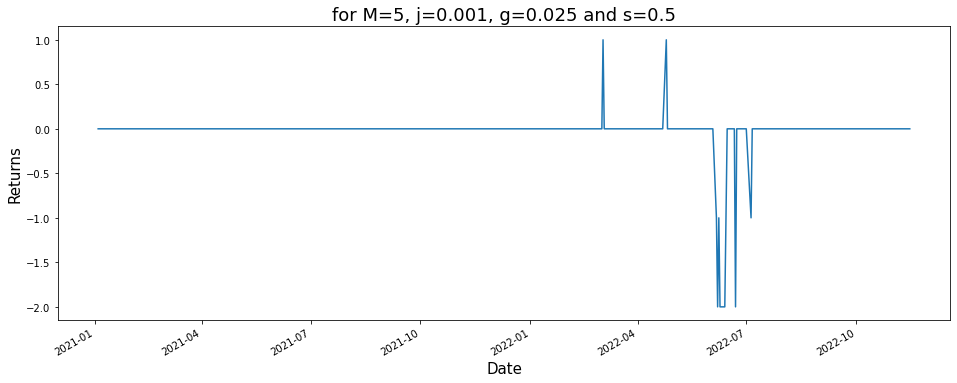

In [1044]:
df_1['return'].plot()
plt.title('for M=5, j=0.001, g=0.025 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)

### for M=5, j=0.025, g=0.05 and s=0.5

Text(0, 0.5, 'Returns')

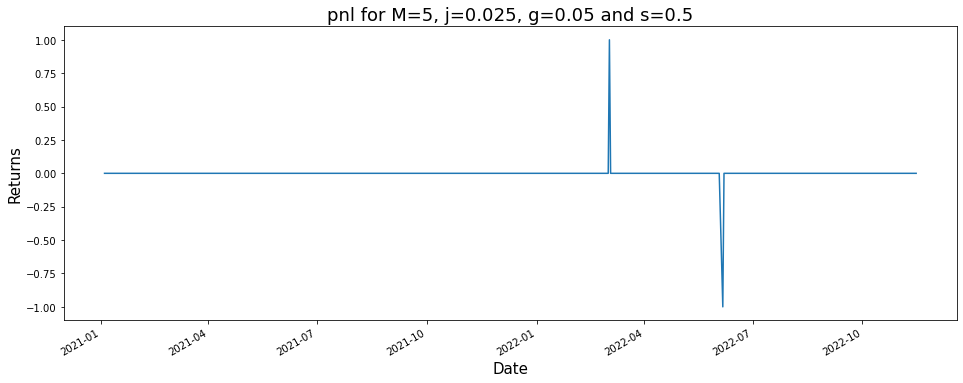

In [1045]:
df_2['return'].plot()
plt.title('pnl for M=5, j=0.025, g=0.05 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)

### for M=5, j=0.001, g=0.025 and s=0.5

Text(0, 0.5, 'Returns')

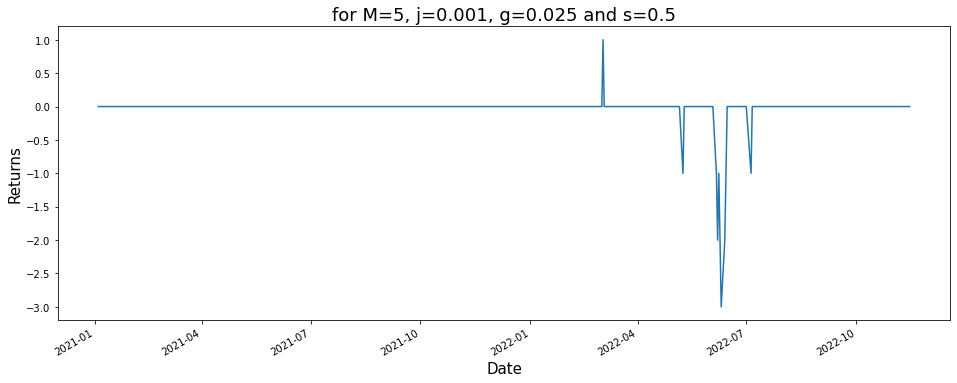

In [1046]:
df_3['return'].plot()
plt.title('for M=5, j=0.001, g=0.025 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)

### Observation:
 - Similar to above, we can infer that the maximum negative returns are observed in case of 1 and 3 and is less in case 2 mainly during July 2022.   <br><br>



# Plotting the cash for different input parameters

### for M=5, j=0, g=0.02 and s=0.5

Text(0, 0.5, 'Returns')

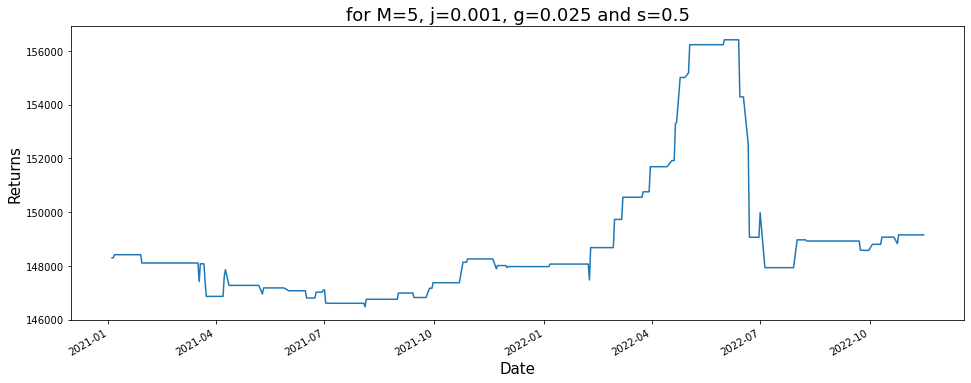

In [1048]:
df_1['cash'].plot()
plt.title('for M=5, j=0.001, g=0.025 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)

### for M=5, j=0.025, g=0.05 and s=0.5

Text(0, 0.5, 'Returns')

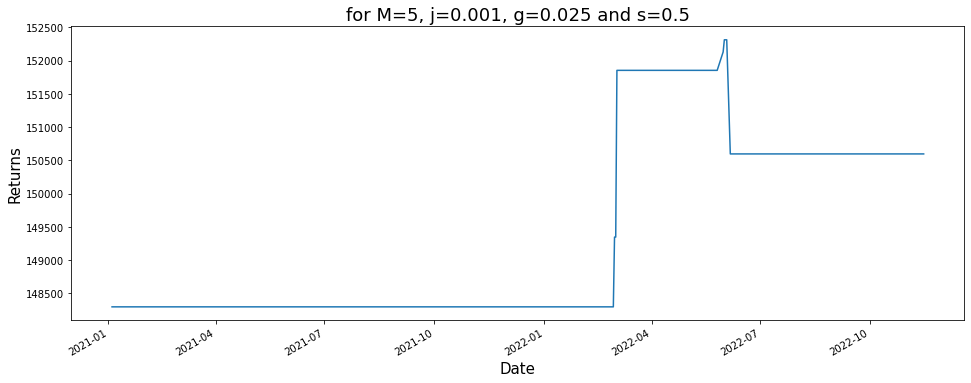

In [1049]:
df_2['cash'].plot()
plt.title('for M=5, j=0.001, g=0.025 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)

### for M=5, j=0.001, g=0.025 and s=0.5

Text(0, 0.5, 'Returns')

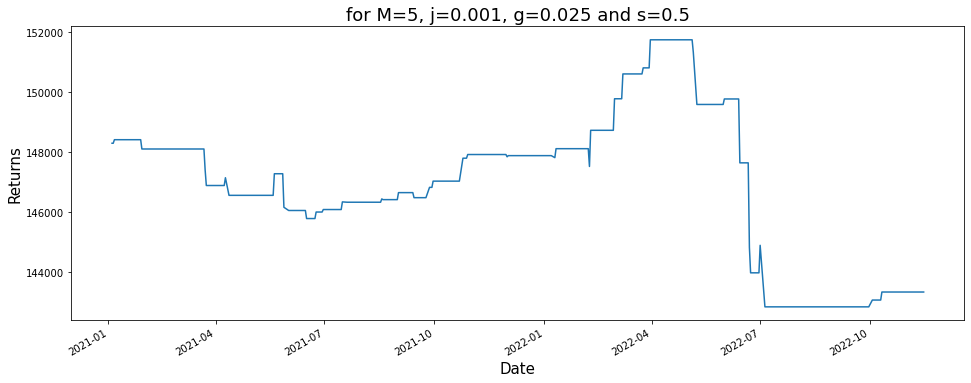

In [1050]:
df_3['cash'].plot()
plt.title('for M=5, j=0.001, g=0.025 and s=0.5', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Returns', fontsize = 15)

# Regression Analysis

 - We perform OLS Regression analysis of pnl and returns data with Famma French Factors extracted earlier. <br><br>


In [1051]:
import statsmodels.api as sm
y = df_1['pnl'].dropna()
X = sm.add_constant(famma_french.loc[y.index])
reg = sm.OLS(y, X).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pnl   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.512
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0211
Time:                        06:46:11   Log-Likelihood:                -3600.0
No. Observations:                 472   AIC:                             7214.
Df Residuals:                     465   BIC:                             7243.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.2628     25.364     -1.627      0.104     -91.105       8.579
Mkt-RF        93.2493     26.585      3.508      0.000      41.008     145.490
SMB            0.9596     62.026      0.015      0.988    -120.926     122.845
HML          -52.6053     65.892     -0.798      0.425    -182.088      76.878
RMW           18.8739     72.112      0.262      0.794    -122.832     160.580
CMA          191.1823     97.407      1.963      0.050      -0.230     382.595
RF           245.4842   6278.029      0.039      0.969   -1.21e+04    1.26e+04
==============================================================================
Omnibus:                      472.297   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26394.651
Skew:                          -4.268   Prob(JB):                         0.00
Kurtosis:                      38.626   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1052]:
import statsmodels.api as sm
y = df_1['return'].dropna()
X = sm.add_constant(famma_french.loc[y.index])
reg = sm.OLS(y, X).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 return   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.699
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0138
Time:                        06:46:11   Log-Likelihood:                 25.263
No. Observations:                 472   AIC:                            -36.53
Df Residuals:                     465   BIC:                            -7.427
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0333      0.012     -2.840      0.005      -0.056      -0.010
Mkt-RF         0.0459      0.012      3.739      0.000       0.022       0.070
SMB            0.0077      0.029      0.268      0.789      -0.049       0.064
HML           -0.0065      0.030     -0.213      0.831      -0.066       0.053
RMW            0.0148      0.033      0.445      0.656      -0.051       0.080
CMA            0.0536      0.045      1.192      0.234      -0.035       0.142
RF             3.2050      2.898      1.106      0.269      -2.490       8.900
==============================================================================
Omnibus:                      599.956   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56049.841
Skew:                          -6.269   Prob(JB):                         0.00
Kurtosis:                      54.892   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation:
 - We see in both the cases R squared value is very very low close to zero which means the model is not performing well and PnL or returns we derived from strategy are less correlated to Famma French Factors.   <br><br>


# Correlation

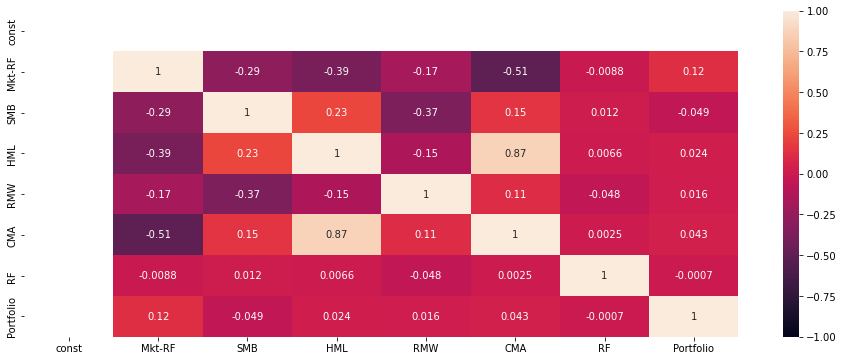

In [957]:
X["Portfolio"] =y
asset_corr= X.corr()
heatmap = sns.heatmap(asset_corr, vmin=-1, vmax=1, annot=True)

# Conclusion
 - The PnL's and returns we have generated through the strategy is not very high. <br><br>
 - The downside returns or PnL's are not very high and seems to be within bound frame except for a particular period.<br><br>
 - As highlighted by professor in the class, this seems to be a very basic and not a very sophisticated strategy which can depend on. 
